<a href="https://colab.research.google.com/github/KAMBLE/ChatBot/blob/master/ARIMAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.tsa.arima_model import ARIMA 

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
def StartARIMAForecasting(Actual,P,D,Q):
  model = ARIMA(Actual,order=(P,D,Q))
  model_fit = model.fit(disp=0)
  prediction = model_fit.forecast()[0]
  return prediction

rates = [[1],[1.5],[2],[4],[6],[8],[16],[1]]

predicted = StartARIMAForecasting(rates,2,1,0)

print('Predicted =%f' % (predicted))

Predicted =29.999999


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('/content/sample_data/exchange.csv')

In [21]:
print(data.head())
print("total Count",len(data))

         Date  GBP/USD Close
0  1998-12-31          88.67
1  1999-01-01          88.67
2  1999-01-04          85.60
3  1999-01-05          83.95
4  1999-01-06          86.96
total Count 5100


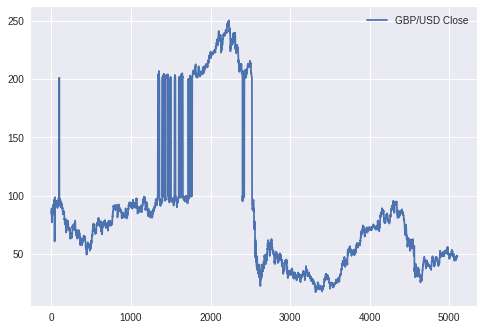

In [17]:
data.plot()

In [23]:
ActualData = data
NumberOfElements = len(ActualData)
print(NumberOfElements)

5100


In [0]:
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

Actual = [x for x in TrainingData]
Predictions = list()

In [42]:
len(TestData)
print("HEAD",TestData.head())
print("TAIL",TestData.tail())
new_data = TestData
new_data= new_data.reset_index(drop=True)
print("new_data",new_data.head())

HEAD             Date  GBP/USD Close
3570  2012-09-06         25.703
3571  2012-09-07         25.211
3572  2012-09-10         25.110
3573  2012-09-11         24.872
3574  2012-09-12         25.363
TAIL             Date  GBP/USD Close
5095  2018-07-12          48.59
5096  2018-07-13          48.56
5097  2018-07-16          48.56
5098  2018-07-17          48.08
5099  2018-07-18          47.40
new_data          Date  GBP/USD Close
0  2012-09-06         25.703
1  2012-09-07         25.211
2  2012-09-10         25.110
3  2012-09-11         24.872
4  2012-09-12         25.363


In [49]:
TestData[0:2]

,Date,GBP/USD Close
3570,2012-09-06,25.703
3571,2012-09-07,25.211


In [0]:
def StartARIMA(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [63]:
for x in range(len(new_data)):
  
  ActualValue = new_data[0:x]
  #ActualValue.append(TestData[x])
  model = ARIMA(ActualValue, order=(3, 1, 0))
  model_fit = model.fit(disp=0)
# 	prediction = model_fit.forecast()[0]
#   print('Actual=%f,Predicted=%f' % (ActualValue,Prediction))
#   Predictions.append(Prediction)
#   Actual.append(ActualValue)
  
# Error = MeanSquaredError(TestData, Predictions)
# print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)


ValueError: ignored